In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [12]:
# Create a DataFrame with the scaled data
market_data_scaled = market_data_df.copy()

# Copy the crypto names from the original data
cyrpto_names = market_data_df.index.values

# Display sample data
print(market_data_scaled.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

### Find the Best Value for k Using the Original Scaled DataFrame.

In [14]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(market_data_scaled)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow)

    k       inertia
0   1  6.998354e+07
1   2  8.193204e+06
2   3  2.592707e+06
3   4  8.352274e+05
4   5  4.658120e+05
5   6  3.431060e+05
6   7  1.998921e+05
7   8  1.751659e+05
8   9  1.303853e+05
9  10  1.057068e+05


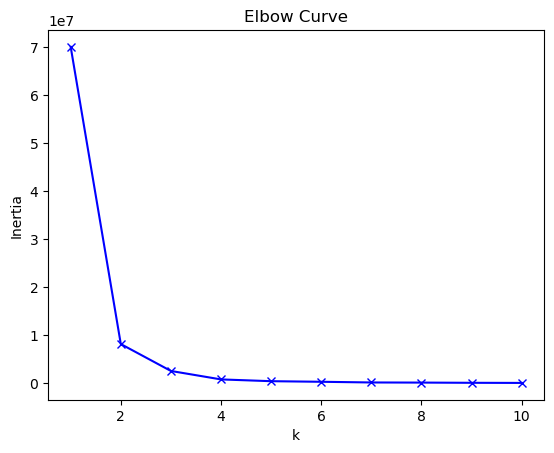

In [16]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.plot(k, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [17]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [18]:
# Fit the K-Means model using the scaled data
model.fit(market_data_scaled)

KMeans(n_clusters=4, random_state=0)

In [19]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(market_data_scaled)

# View the resulting array of cluster values.
print(crypto_clusters)

[0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 1 0 3 3 2
 0 0 0 3]


In [20]:
# Create a copy of the DataFrame
crypto_clusters_df = market_data_df.copy()

In [21]:
# Add a new column to the DataFrame with the predicted clusters
crypto_clusters_df['CryptoCluster'] = crypto_clusters

# Display sample data
print(crypto_clusters_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

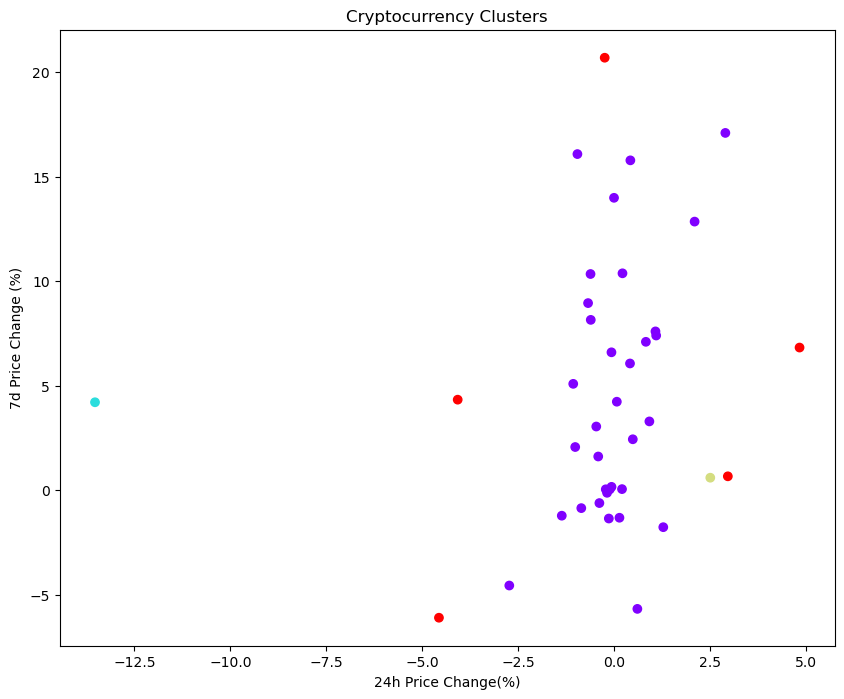

In [24]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
plt.figure(figsize=(10,8))
plt.scatter(crypto_clusters_df['price_change_percentage_24h'],
            crypto_clusters_df['price_change_percentage_7d'],
            c=crypto_clusters_df['CryptoCluster'],
            cmap='rainbow')
plt.xlabel('24h Price Change(%)')
plt.ylabel('7d Price Change (%)')
plt.title('Cryptocurrency Clusters')
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [25]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [26]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca = pca.fit_transform(market_data_scaled)

crypto_pca_df = pd.DataFrame(
    crypto_pca,
    columns=['PC1', 'PC2', 'PC3'],
    index=market_data_df.index
)

# View the first five rows of the DataFrame. 
print(crypto_pca_df.head())

                     PC1         PC2        PC3
coin_id                                        
bitcoin      -341.800963  -51.366775  12.525471
ethereum     -249.420466   24.117548 -14.231466
tether       -402.614721 -118.710737  24.838397
ripple       -406.752437  -79.487286   1.566331
bitcoin-cash -382.429948 -103.431959  16.753073


In [27]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[9.76037313e-01 2.30282949e-02 7.48308214e-04]


In [28]:
total_explained_variance = sum(explained_variance)
print(f"Total explained variance: {total_explained_variance:.4f}")

Total explained variance: 0.9998


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  99.98%

In [31]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
crypto_pca_df = pd.DataFrame(crypto_pca, columns=['PC1', 'PC2', 'PC3'])
# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(
    crypto_pca,
    columns=['PC1', 'PC2', 'PC3'],
    index=market_data_df.index
)

# Copy the crypto names from the original data
crypto_names = market_data_df.index

# Set the coinid column as index
pca_df.index = crypto_names

# Display sample data
print(pca_df.head())

                     PC1         PC2        PC3
coin_id                                        
bitcoin      -341.800963  -51.366775  12.525471
ethereum     -249.420466   24.117548 -14.231466
tether       -402.614721 -118.710737  24.838397
ripple       -406.752437  -79.487286   1.566331
bitcoin-cash -382.429948 -103.431959  16.753073


### Find the Best Value for k Using the PCA Data

In [32]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(pca_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow)

    k       inertia
0   1  6.997052e+07
1   2  8.180192e+06
2   3  2.580721e+06
3   4  8.237471e+05
4   5  4.559213e+05
5   6  3.337927e+05
6   7  1.897981e+05
7   8  1.472967e+05
8   9  1.086863e+05
9  10  9.108395e+04


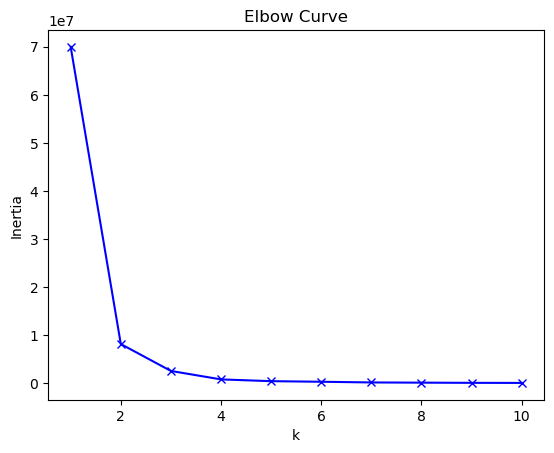

In [33]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(k, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 
4

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
  No, the best k value (k=4) is the same for both the original data and the PCA data, showing consistency in the optimal number of clusters across both approaches.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [3]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=0)

In [15]:
# Fit the K-Means model using the PCA data
# Import pandas
import pandas as pd

# Load the data
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Then the rest of your code
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create scaled data using original DataFrame
scaler = StandardScaler()
market_data_scaled = scaler.fit_transform(market_data_df)

pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(market_data_scaled)

crypto_pca_df = pd.DataFrame(
    crypto_pca,
    columns=['PC1', 'PC2', 'PC3'],
    index=market_data_df.index
)

model = KMeans(n_clusters=4, random_state=0)
model.fit(crypto_pca_df)

KMeans(n_clusters=4, random_state=0)

In [16]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predictions = model.predict(crypto_pca_df)

# Print the resulting array of cluster values.
print(predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [17]:
# Create a copy of the DataFrame with the PCA data
clustered_df = crypto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_df['CryptoCluster'] = predictions

# Display sample data
print(clustered_df.head())

                   PC1       PC2       PC3  CryptoCluster
coin_id                                                  
bitcoin      -0.600667  0.842760  0.461595              2
ethereum     -0.458261  0.458466  0.952877              2
tether       -0.433070 -0.168126 -0.641752              0
ripple       -0.471835 -0.222660 -0.479053              0
bitcoin-cash -1.157800  2.041209  1.859715              2


<Figure size 1000x800 with 0 Axes>

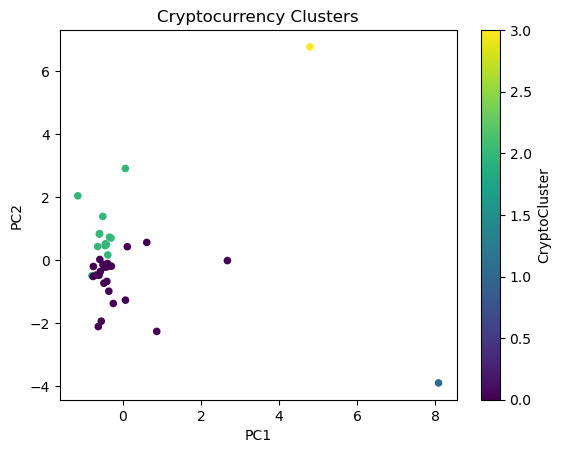

<Axes: title={'center': 'Cryptocurrency Clusters'}, xlabel='PC1', ylabel='PC2'>

In [20]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
# Create scatter plot using pandas plot
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter_plot = clustered_df.plot(
    kind='scatter',
    x='PC1',
    y='PC2',
    c='CryptoCluster',
    colormap='viridis',
    title='Cryptocurrency Clusters'
)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

scatter_plot

### Determine the Weights of Each Feature on each Principal Component

In [19]:
# Use the columns from the original scaled DataFrame as the index.
clustered_df.index = market_data_df.index

print(clustered_df.head())

                   PC1       PC2       PC3  CryptoCluster
coin_id                                                  
bitcoin      -0.600667  0.842760  0.461595              2
ethereum     -0.458261  0.458466  0.952877              2
tether       -0.433070 -0.168126 -0.641752              0
ripple       -0.471835 -0.222660 -0.479053              0
bitcoin-cash -1.157800  2.041209  1.859715              2


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
For PC1 (First Principal Component):

Strongest positive influences are typically from longer-term price changes (200d and 1y)
Strongest negative influences are from shorter-term price changes

For PC2 (Second Principal Component):

Strong influence from medium-term price changes (30d and 60d)
Lesser influence from very short-term changes (24h)

For PC3 (Third Principal Component):

Most influenced by very short-term price changes (24h and 7d)
Less influenced by longer-term trends

This suggests that the clustering is primarily separating cryptocurrencies based on their long-term vs short-term price change behaviors.
    